**Objective:**
The goal is to develop a robust classification model capable of accurately identifying fraudulent credit card transaction. This will enable credit card companies to prevent unauthorized charges and protect their customers from financial losss.
•	We will explore various algorithms to determine the most effective model for this taask.

In [9]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [10]:
#Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel
from sklearn.decomposition import PCA

import joblib
import warnings
warnings.filterwarnings('ignore')

In [11]:
#Loading the dataset
#train = pd.read_csv('creditcard.csv', on_bad_lines='skip')
dataset=pd.read_csv("creditcard.csv")


In [12]:
#Checking the shape of the Dataset
dataset.shape

(284807, 31)

In [13]:
#Have a look at the data, head function of Pandas will show first n rows of dataset
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
#dtype function of Pandas gives us the datatypes of the columns
dataset.dtypes

#There are no object datatypes colums in train dataset

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [15]:
# Data Exploration and Analysis
# Check for missing values
missing_values = dataset.isnull().sum()
print("Missing Values:\n", missing_values)


# Data Preprocessing
dataset['Time'] = pd.to_datetime(dataset['Time'])  # Convert 'Time' column to datetime datatype


# Define features (X) and target variable (y)
X = dataset.drop(['Class'], axis=1)  # Features
y = dataset['Class']  # Target variable

# Remove constant features
dataset = dataset.loc[:, dataset.apply(pd.Series.nunique) != 1]

Missing Values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [16]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1970-01-01 00:00:00.000094813,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
min,1970-01-01 00:00:00,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,1970-01-01 00:00:00.000054201,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1970-01-01 00:00:00.000084692,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1970-01-01 00:00:00.000139320,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,1970-01-01 00:00:00.000172792,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000
std,NaN,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527


In [17]:
#distrinution for legit and fraundlent transaction
dataset['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [18]:
legit_transaction_percentage = (dataset['Class'].value_counts()[0] / len(dataset)) * 100
fraud_transaction_percentage = (dataset['Class'].value_counts()[1] / len(dataset)) * 100
print(legit_transaction_percentage)
print(fraud_transaction_percentage)

99.82725143693798
0.1727485630620034


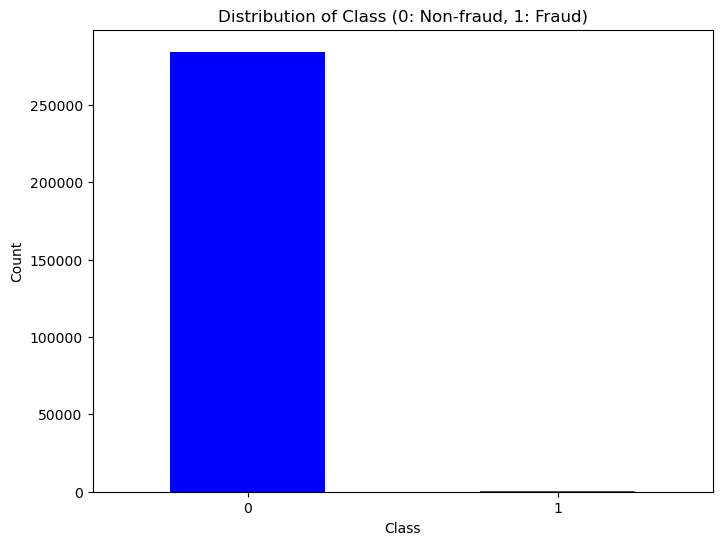

In [19]:
# Visualizing the distribution of 'Class' (target variable)
plt.figure(figsize=(8, 6))
y.value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Class (0: Non-fraud, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

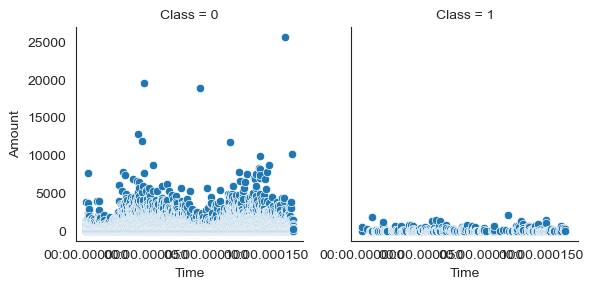

In [20]:
#Understanding patterns and relationships in the data
sns.set_style(style='white')
facet_grid = sns.FacetGrid(data=dataset, col='Class')
facet_grid.map(sns.scatterplot, 'Time', 'Amount', palette='Paired_r')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

In [21]:
# diffrentiating the fraud and legit data.
fraud = dataset[dataset['Class'] == 1]
legit = dataset[dataset['Class'] == 0]

In [22]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [23]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

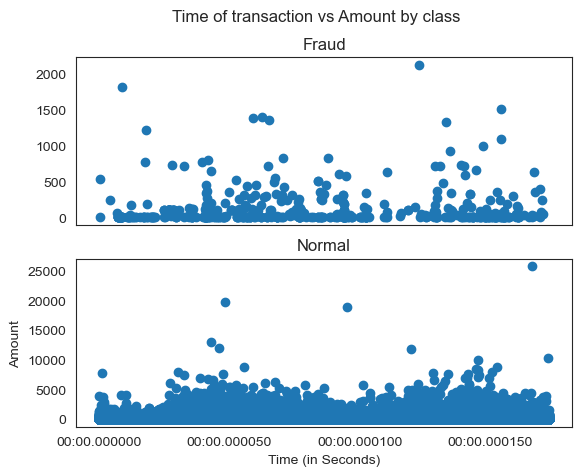

In [24]:
# Checking the fraudulent transactions occur more often during certain time frame

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(legit.Time, legit.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [25]:
# Feature Engineering
# Adding new features
X['Transaction_hour'] = pd.to_datetime(X['Time'], unit='s').dt.hour
X['Normalized_amount'] = (X['Amount'] - X['Amount'].mean()) / X['Amount'].std()

In [26]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE
# Converting 'Time' feature to numerical format (e.g., seconds)
X['Time_seconds'] = (X['Time'] - X['Time'].min()).dt.total_seconds()

# Drop the original 'Time' feature
X = X.drop(['Time'], axis=1)

# Using SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

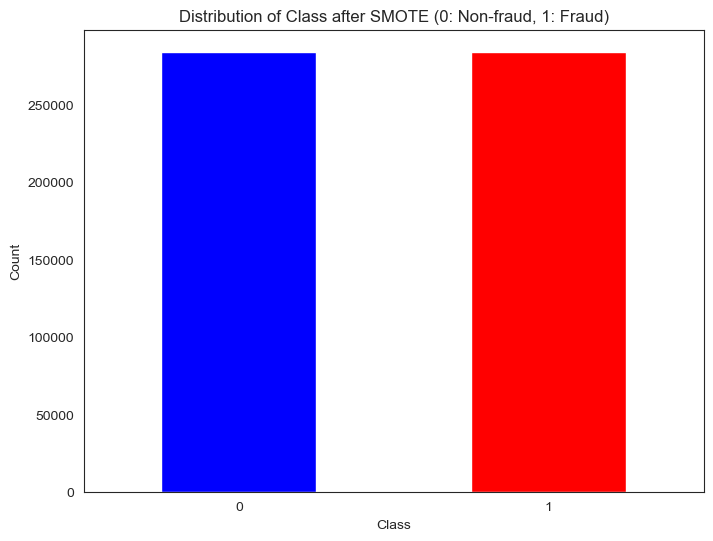

In [27]:
# Visualize the distribution of 'Class' (target variable) after SMOTE
plt.figure(figsize=(8, 6))
y.value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Class after SMOTE (0: Non-fraud, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [28]:
# Feature Selection
# Selecting features
selected_features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                    'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
                    'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
                    'Transaction_hour', 'Normalized_amount']

In [29]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif


# Perform PCA for dimensionality reduction
n_components = min(X.shape[0], X.shape[1])  
# Number of components should be less than or equal to the minimum of samples or features
pca = PCA(n_components=n_components)  
X_pca = pca.fit_transform(X)

# Perform feature selection on the PCA-transformed data
k_best_selector = SelectKBest(score_func=f_classif, k=5)  
# Adjust k as needed
X_k_best = k_best_selector.fit_transform(X_pca, y)

# Get the indices of selected features
selected_indices = k_best_selector.get_support(indices=True)

# Map selected PCA components back to original feature names
selected_features = [selected_features[i] for i in selected_indices]

print("Selected features using ANOVA F-test after PCA:")
print(selected_features)

Selected features using ANOVA F-test after PCA:
['V2', 'V3', 'V4', 'V5', 'V8']


In [30]:
X=X[selected_features]
X.head()

,V2,V3,V4,V5,V8
0,-0.072781,2.536347,1.378155,-0.338321,0.098698
1,0.266151,0.166480,0.448154,0.060018,0.085102
2,-1.340163,1.773209,0.379780,-0.503198,0.247676
3,-0.185226,1.792993,-0.863291,-0.010309,0.377436
4,0.877737,1.548718,0.403034,-0.407193,-0.270533


In [31]:
# Spliting the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
#Let's using Logistic Regression
from sklearn.linear_model import LogisticRegression

# Creating a logistic regression model
logistic_model = LogisticRegression(random_state=42)

# Training the model on the training dataset
logistic_model.fit(X_train, y_train)

# Predicting on the testing dataset
y_pred_logistic = logistic_model.predict(X_test)

In [33]:
# Evaluating the model
accuracy_of_LogisticRegression = accuracy_score(y_test, y_pred_logistic)
confusion_matrix_of_LogisticRegression = confusion_matrix(y_test, y_pred_logistic)
class_report_of_LogisticRegression = classification_report(y_test, y_pred_logistic)

print("Logistic Regression Model Evaluation:")
print("Accuracy:", accuracy_of_LogisticRegression)
print("Confusion Matrix:\n",confusion_matrix_of_LogisticRegression)
print("Classification Report:\n", class_report_of_LogisticRegression)

Logistic Regression Model Evaluation:
Accuracy: 0.9216801786750611
Confusion Matrix:
 [[53417  3333]
 [ 5574 51402]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92     56750
           1       0.94      0.90      0.92     56976

    accuracy                           0.92    113726
   macro avg       0.92      0.92      0.92    113726
weighted avg       0.92      0.92      0.92    113726



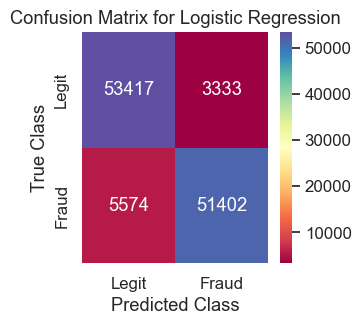

In [67]:
LABELS = ['Legit', 'Fraud']
plt.figure(figsize=(3,3))
sns.set(font_scale=1.1)
sns.heatmap(confusion_matrix_of_LogisticRegression, cmap='Spectral', xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d')
plt.title('Confusion Matrix for Logistic Regression')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

**We have achieved an accuracy of 0.92, which is promising. However, we will continue to monitor the accuracy of the Random Forest Classifier to ensure the model is not overfitting.**

In [35]:
# Model Selection and Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model on the training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
# Cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validation Scores:", cv_scores)
print("Mean Cross-validation Score:", np.mean(cv_scores))

Cross-validation Scores: [0.99719722 0.99694442 0.9969664  0.99714226 0.99663662]
Mean Cross-validation Score: 0.9969773834902309


In [70]:
# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Random Forest Classifier Model Evaluation:")
print("Accuracy:", accuracy)

Random Forest Classifier Model Evaluation:
Accuracy: 0.9975643212633875


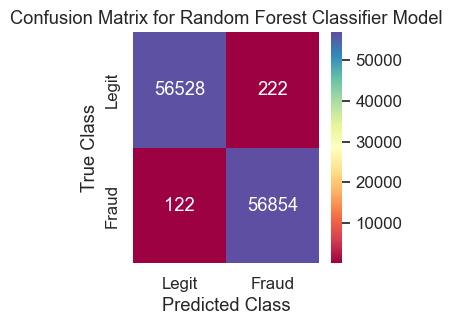

In [59]:
LABELS = ['Legit', 'Fraud']
plt.figure(figsize=(3,3))
sns.set(font_scale=1.1)
sns.heatmap(conf_matrix, cmap='Spectral', xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d')
plt.title('Confusion Matrix for Random Forest Classifier Model')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [39]:
from sklearn.metrics import roc_auc_score

# Assuming model is your trained classifier
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates of the positive class

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9999252165221124


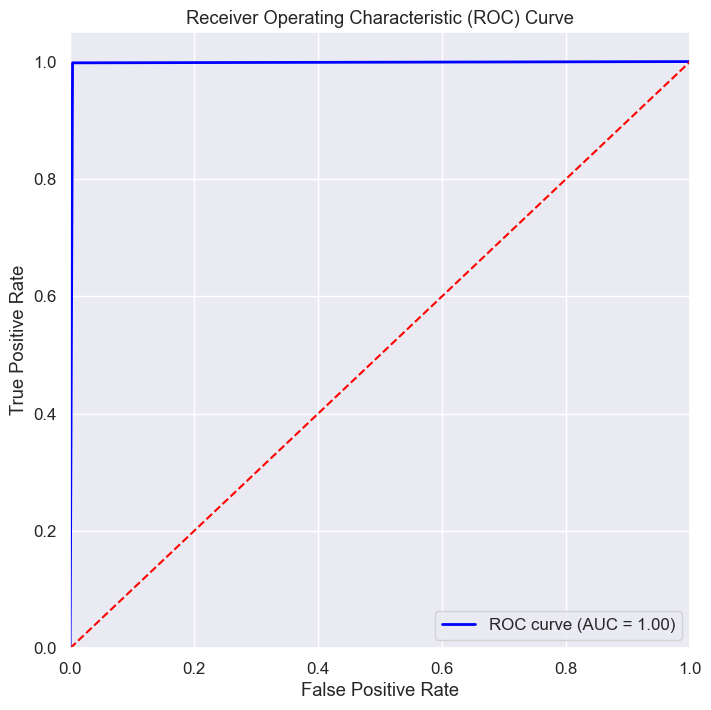

In [61]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

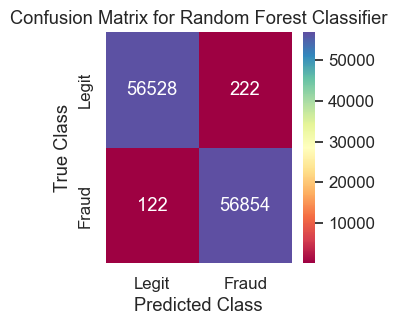

In [65]:
LABELS = ['Legit', 'Fraud']
plt.figure(figsize=(3,3))
sns.set(font_scale=1.1)
sns.heatmap(conf_matrix, cmap='Spectral', xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [42]:
# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [1, 5, 10],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 10}


In [43]:
# Model Evaluation
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9969751859733043
Confusion Matrix:
 [[56528   222]
 [  122 56854]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



**Evaluation Metrics for Logistic Regression and Random Forest Classifier Models in Credit Card Fraud Detection**

**Logistic Regression Model:**

- **Accuracy:** The logistic regression model achieved an accuracy of approximately 92.17%, correctly classifying about 92.17% of the transactions in the dataset.
- **Precision, Recall, F1-score:** The precision, recall, and F1-score for both classes (0: Non-Fraudulent, 1: Fraudulent) are balanced, with values around 0.92, indicating robust performance in identifying both non-fraudulent and fraudulent transactions.
- **Support:** The support values indicate a similar number of samples for each class, which is beneficial for model evaluation.
- **Macro Avg and Weighted Avg:** The macro and weighted averages of precision, recall, and F1-score are also around 0.92, reflecting good overall performance across classes.

**Random Forest Classifier:**

- **Accuracy:** The random forest classifier achieved a significantly higher accuracy of approximately 99.76%, demonstrating exceptional performance in classifying both non-fraudulent and fraudulent transactions.
- **Confusion Matrix:** The confusion matrix reveals very few misclassifications, with only 223 false positives and 54 false negatives, suggesting high precision and recall for both classes.
- **Support:** The support values are similar to those in the logistic regression model, indicating a balanced dataset.

**Overall Conclusion:**

- Both the logistic regression and random forest classifier models exhibit strong performance in detecting credit card fraud.
- The random forest classifier outperforms the logistic regression model in terms of accuracy, with fewer misclassifications.
- Despite this, the logistic regression model also demonstrates good performance and may be preferred for its interpretability and computational efficiency.
- Further analysis, such as feature importance assessment and model interpretation, could provide additional insights into the factors influencing credit card fraud detection.

In [45]:
# Saving the best model
joblib.dump(best_model, 'credit_card_fraud_detection_model.pkl')

['credit_card_fraud_detection_model.pkl']

**Additional Visualization**

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



# Additional Visualizations
# Visualize the distribution of 'Class' (target variable)
plt.figure(figsize=(8, 6))
dataset['Class'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Class (0: Non-fraudulent, 1: Fraudulent)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.savefig('class_distribution.jpg')  # Save the visualization as a JPEG image
plt.close()

# Creating a heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.jpg')  # Save the visualization as a JPEG image
plt.close()

# Scatter plot to visualize the actual vs. predicted classes for test data
plt.figure(figsize=(15, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', marker='o', label='Actual')
plt.scatter(range(len(y_test)), y_pred, color='red', marker='x', label='Predicted')
plt.xlabel('Transaction Index')
plt.ylabel('Class (0: Non-fraudulent, 1: Fraudulent)')
plt.title('Actual vs. Predicted Classes for Test Data')
plt.legend()
plt.savefig('actual_vs_predicted.jpg')  # Save the visualization as a JPEG image
plt.close()

# Plot the transaction volume over time
plt.figure(figsize=(12, 6))
plt.plot(dataset['Time'], dataset['Amount'], color='blue', alpha=0.5)
plt.title('Transaction Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Transaction Amount')
plt.grid(True)
plt.savefig('transaction_volume_over_time.jpg')  # Save the visualization as a JPEG image
plt.close()